## Day 34: Income Data Analysis  

For this challenge, you are going to preprocess and 
analyze income data. You will import a CSV file called 
income_data. 

1. Using pandas, write a code to display only 5 rows from the 
data. How many males and females are in the dataset? 


In [1]:
import pandas as pd
df = pd.read_csv("income_data.csv")
df.head(5)

,Name,Age,Height,Gender,Income
0,Alice,25,5.5,F,30000
1,Bob,35,5.9,M,40000
2,Charlie,45,6.2,M,50000
3,Debbie,55,6.6,F,60000
4,Edward,65,6.1,M,70000


In [9]:
df["Gender"].value_counts()

Gender
M    6
F    4
Name: count, dtype: int64

2. What is Edward’s height? 


In [18]:
# Find the iindex for Edward 
index_edward = df[df["Name"]=="Edward"].index

# Use index to find Edward's height
edward_height = df.loc[index_edward, "Height"]
print(f"Edwards height is {edward_height.iloc[0]}")

Edwards height is 6.1


3. Write another code to create a subset DataFrame of only 
female names from the DataFrame above. Reset the index 
and drop it as a column. 


In [25]:
# Using query to filter the DataFrame
df_female = df.query('Gender =="F"')

# Resetting the index 
df_female.reset_index(inplace=True, drop=True)
df_female

,Name,Age,Height,Gender,Income
0,Alice,25,5.5,F,30000
1,Debbie,55,6.6,F,60000
2,Greta,76,6.3,F,90000
3,Ivy,60,6.7,F,110000


4. What is the average income per female? 


In [27]:
avg_female = df_female["Income"].mean()
print(f"The average income per Female is {avg_female}")

The average income per Female is 72500.0


5. Your boss suspects that there is a correlation between the 
person's age and their income. She asks you to create a plot 
to show this correlation. Using Pandas and Matplotlib, 
create a scatter plot of age against income. 


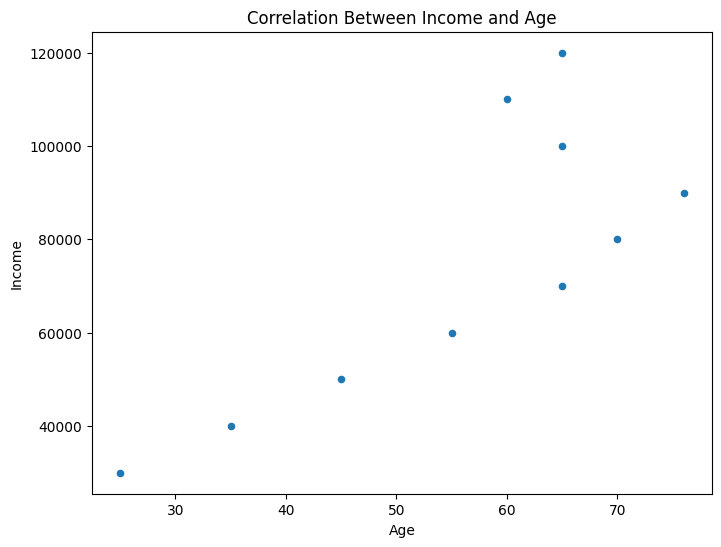

In [28]:
import matplotlib.pyplot as plt

df.plot(x='Age', y='Income',
        kind='scatter',
        figsize=(8, 6))
plt.title("Correlation Between Income and Age", fontsize = 12)
plt.show()

6. What is the average income of males over 50 compared to 
the average salary of females over 50? Plot a bar plot using 
Matplotlib.

The average income for males over 50 is 92500.0
The average incoe for females is 86666.66666666667


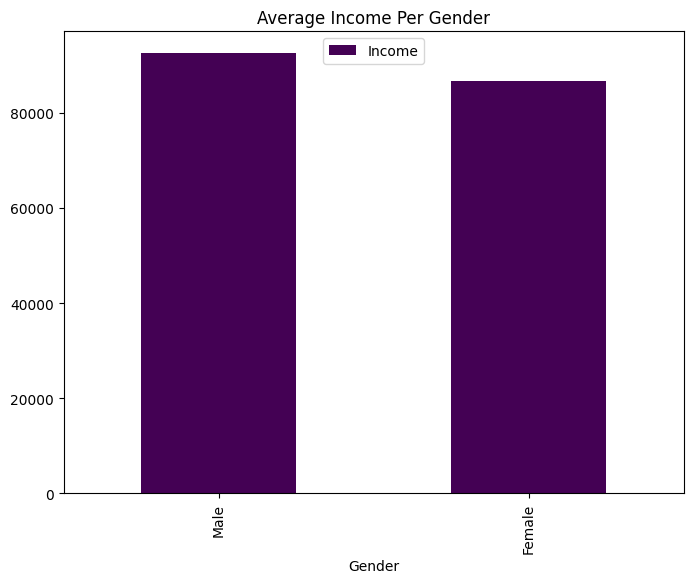

In [30]:
# Filter the DataFrame and calculate mean
males_over_50 = df[(df["Gender"]=='M') & (df['Age'] > 50)]['Income'].mean()
females_over_50 = df[(df['Gender'] == 'F') & (df['Age'] > 50)]['Income'].mean()

print(f"The average income for males over 50 is {males_over_50}")
print(f"The average incoe for females is {females_over_50}")

# Creating a DataFrame of females and males ave income
data = {'Gender': ['Male', 'Female'],
        'Income': [males_over_50, females_over_50]}

# Plotting data 
bar_df = pd.DataFrame(data)

bar_df.plot(x='Gender', y='Income', kind='bar',
            figsize=(8, 6), colormap= 'viridis')
plt.title("Average Income Per Gender", fontsize = 12)
plt.legend(loc='upper center')
plt.show()